In [94]:
#Hist rates for forwards 

import pandas as pd
import numpy as np 
from scipy.stats import norm 
import scipy.interpolate


aus_hist_zero = pd.read_csv('For_Aus_Zero.csv')
X = [0,30,60,90,180,270,365,730,1095,1460]

tointerp = [123, 247, 276, 374] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, aus_hist_zero.iloc[row, 1:], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_aus_rates = pd.DataFrame(df, columns = tointerp)
#interp_aus_rates

Disfact = pd.DataFrame()
for i in Dateindex:
    for j in tointerp:
        val = (interp_aus_rates.loc[i, j] / 100) * (j / 365)
        Disfact.loc[i,j] = np.exp(-val)
        

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))
jtest = [0,1,2,3]
HS_aus_rate = pd.DataFrame()
for i in list(range(0,2761)):
    for j in jtest:
        HS_aus_rate.loc[i, j] = (1+ df.iloc[i,j]) * interp_aus_rates.iloc[2761,j]

In [72]:
#EUR Rates
eur_hist_zero = pd.read_csv('EUR_zero_rate.csv')
X = [182.5, 273.5, 365]

tointerp = [247] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, eur_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_eur_rates = pd.DataFrame(df, columns = tointerp)

Disfact = []
for i in Dateindex:
    val = (interp_eur_rates.iloc[i, 0] / 100) * (247 / 365)
    Eur_DF = np.exp(-val)
    Disfact.append(Eur_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_eur_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_eur_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_eur_rates.iloc[2761,0]
#test = (1+ln_dis) * eur_interp_rates.iloc[2761,0]
#test
#interp_eur_rates


,0,1,2,3
0,1.021087,0.947225,0.928096,0.901752
1,1.020281,0.946808,0.927705,0.901496
2,1.020220,0.946816,0.927915,0.901706
3,1.020503,0.946991,0.927915,0.901716
4,1.020319,0.946969,0.927915,0.901726
5,1.020463,0.946940,0.927915,0.901731
6,1.020654,0.947084,0.927915,0.901737
7,1.020464,0.946999,0.927915,0.901714
8,1.020460,0.946999,0.927915,0.901738
9,1.020513,0.947132,0.927915,0.901718


In [75]:
#USD Rates
usd_hist_zero = pd.read_csv('USD_zero_forward.csv')
X = [60,90,182.5]

tointerp = [123] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, usd_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_usd_rates = pd.DataFrame(df, columns = tointerp)
#interp_usd_rates

Disfact = []
for i in Dateindex:
    val = (interp_usd_rates.iloc[i, 0] / 100) * (123 / 365)
    USD_DF = np.exp(-val)
    Disfact.append(USD_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_USD_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_USD_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_usd_rates.iloc[2761,0]

In [77]:
#JPY Rates
jpy_hist_zero = pd.read_csv('JPY_zero_rate.csv')
X = [273.5, 365]

tointerp = [276] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, jpy_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_jpy_rates = pd.DataFrame(df, columns = tointerp)
#interp_jpy_rates

Disfact = []
for i in Dateindex:
    val = (interp_usd_rates.iloc[i, 0] / 100) * (276 / 365)
    jpy_DF = np.exp(-val)
    Disfact.append(jpy_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_jpy_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_jpy_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_jpy_rates.iloc[2761,0]

In [79]:
#CHF Rates
chf_hist_zero = pd.read_csv('CHF_zero_rates.csv')
X = [365, 730]

tointerp = [374] 

Dateindex = list(range(0,2762))

df = [] 

for row in Dateindex:
    
    #this is interpolation function that iterates over the bond_yields data frame row by row looking at yields 

    interp = scipy.interpolate.interp1d(X, chf_hist_zero.iloc[row, :], bounds_error=False, fill_value=scipy.nan)
    
    outtest = []
    
    for intx in tointerp:
        
        outtest.append(float(interp(intx)))
        
    df.append(outtest)
    outtest = []

interp_chf_rates = pd.DataFrame(df, columns = tointerp)
#interp_chf_rates
Disfact = []
for i in Dateindex:
    val = (interp_chf_rates.iloc[i, 0] / 100) * (374 / 365)
    chf_DF = np.exp(-val)
    Disfact.append(chf_DF)

df = pd.DataFrame(Disfact)
df = np.log(df).diff()
df = (df.drop(df.index[0]))

HS_chf_rate = pd.DataFrame()
for i in list(range(0,2761)):
    HS_chf_rate.loc[i, 'HS'] = (1+ df.iloc[i,0]) * interp_chf_rates.iloc[2761,0]

In [6]:
forwards = pd.read_csv('For_for_exch.csv')

def lectfor(buy, S, y, t, sell, r):
    y = y/100
    r = r/100
    price = ((buy*1000000) * (1 / S) * np.exp(-y *(t/365))) - ((sell*1000000) * np.exp(-r*(t/365)))
    return price 

#Forward Contract
# S = spot price of one unit of cash asset
# K = contracted forward price
# r = domestic risk free rate 
# y = income flow on the asset (forein risk free rate r* when asset is foreign currency) 
# t = time to maturity 

def forward(S, K, r, y, t):
    
    f = S * np.exp(-y * t) - K * np.exp(-r * t)
    
    return f



In [7]:
forward_hs_sim = pd.read_csv('HS_sim_for_price.csv')
#forward_hs_sim

In [8]:
##USD FORWARD

df = pd.DataFrame()
Dateindex = list(range(0,2760))
outtest = pd.DataFrame()
outtest['USD Price'] = ""

for x in Dateindex:
    r = interp_aus_rates.iloc[x,0] #USD maturity
    y = interp_usd_rates.iloc[x,0]
    S = forward_hs_sim.iloc[x,1]
    outtest.loc[x, 'USD Price']  = lectfor(
            forwards.loc[0, 'Buy Amount '],
            S,
            y,
            forwards.loc[0, 'Maturity'],
            forwards.loc[0, 'Sell amount '],
            r
                                )
#outtest

In [9]:
outtest['EUR Price'] = ""

for x in Dateindex:
    r = interp_aus_rates.iloc[x,1] #EUR maturity
    y = interp_eur_rates.iloc[x,0]
    S = forward_hs_sim.iloc[x,0]
    outtest.loc[x, 'EUR Price']  = lectfor(
            forwards.loc[1, 'Buy Amount '],
            S,
            y,
            forwards.loc[1, 'Maturity'],
            forwards.loc[1, 'Sell amount '],
            r
                                )
#outtest

In [10]:
outtest['JPY Price'] = ""

for x in Dateindex:
    r = interp_aus_rates.iloc[x,2] #JPY maturity
    y = interp_jpy_rates.iloc[x,0]
    S = forward_hs_sim.iloc[x,2]
    outtest.loc[x, 'JPY Price']  = lectfor(
            forwards.loc[2, 'Buy Amount '],
            S,
            y,
            forwards.loc[2, 'Maturity'],
            forwards.loc[2, 'Sell amount '],
            r
                                )
  

In [11]:
outtest['CHF Price'] = ""

for x in Dateindex:
    r = interp_aus_rates.iloc[x,3] #CHF maturity
    y = interp_chf_rates.iloc[x,0]
    S = forward_hs_sim.iloc[x,3]
    outtest.loc[x, 'CHF Price']  = lectfor(
            forwards.loc[3, 'Buy Amount '],
            S,
            y,
            forwards.loc[3, 'Maturity'],
            forwards.loc[3, 'Sell amount '],
            r
                                )

In [12]:
forwards

,Expiry,Maturity,Buy Currency,Buy Amount,Sell Currency,Sell amount,K,S,r,y
0,3/12/2019,123,USD,25,AUD,37.31343,0.67,0.6812,NaN,NaN
1,5/04/2020,247,EUR,20,AUD,32.25806,0.62,0.6148,NaN,NaN
2,4/05/2020,276,JPY,900,AUD,10.94891,82.20,72.9700,NaN,NaN
3,10/08/2020,374,CHF,35,AUD,47.29730,0.74,0.6738,NaN,NaN


In [13]:
outtest

,USD Price,EUR Price,JPY Price,CHF Price
0,-480144,-217391,1.34775e+06,4.54329e+06
1,-1.02122e+06,-155335,1.15949e+06,4.40364e+06
2,-358116,-345937,1.37713e+06,4.15151e+06
3,-780643,-68603.9,1.27759e+06,4.80785e+06
4,591686,1.53388e+06,1.9994e+06,7.57755e+06
5,-346003,443610,1.67717e+06,5.81896e+06
6,597882,627405,1.98592e+06,5.86284e+06
7,462958,994103,1.89079e+06,6.73527e+06
8,-44935.6,523347,1.57727e+06,6.08857e+06
9,617845,1.07903e+06,1.90532e+06,6.93045e+06


In [14]:
outtest['Portfolio'] = outtest.sum(axis=1)
outtest['PnL'] = outtest['Portfolio'] - 6816712.610575922  #mtm 

In [15]:
outtest

,USD Price,EUR Price,JPY Price,CHF Price,Portfolio,PnL
0,-480144,-217391,1.34775e+06,4.54329e+06,5.193505e+06,-1.623207e+06
1,-1.02122e+06,-155335,1.15949e+06,4.40364e+06,4.386580e+06,-2.430132e+06
2,-358116,-345937,1.37713e+06,4.15151e+06,4.824586e+06,-1.992126e+06
3,-780643,-68603.9,1.27759e+06,4.80785e+06,5.236187e+06,-1.580526e+06
4,591686,1.53388e+06,1.9994e+06,7.57755e+06,1.170252e+07,4.885805e+06
5,-346003,443610,1.67717e+06,5.81896e+06,7.593731e+06,7.770188e+05
6,597882,627405,1.98592e+06,5.86284e+06,9.074050e+06,2.257338e+06
7,462958,994103,1.89079e+06,6.73527e+06,1.008312e+07,3.266412e+06
8,-44935.6,523347,1.57727e+06,6.08857e+06,8.144251e+06,1.327539e+06
9,617845,1.07903e+06,1.90532e+06,6.93045e+06,1.053265e+07,3.715933e+06


In [16]:
PnL = np.array(outtest['PnL'])
PnL.sort()
import matplotlib.pyplot as plt
plt.hist(PnL, bins = 100)
np.percentile(PnL, 5)

-151857.4034498445

-1465261.061405363

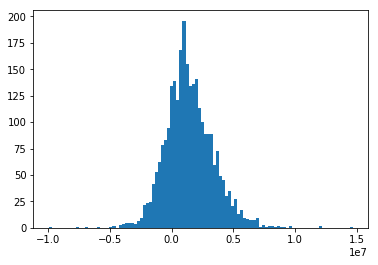

In [17]:
opt_pnl_1 = pd.read_csv('opt_pnlvec_1.csv')

opt_pnl_2 = pd.read_csv('opt_pnlvec_2.csv')

port_pnl_1 = outtest['PnL'] + opt_pnl_1['PnL Vec']

port_pnl_1 = np.array(port_pnl_1)
port_pnl_1.sort()
import matplotlib.pyplot as plt
plt.hist(port_pnl_1, bins = 100)
np.percentile(port_pnl_1, 5)

-1041589.9285534618

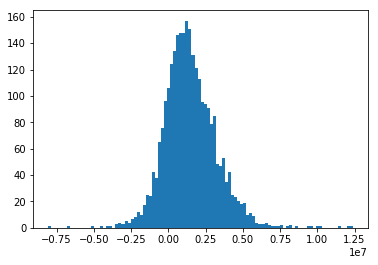

In [18]:
port_pnl_2 = outtest['PnL'] + opt_pnl_2['PnL Vec']

port_pnl_2 = np.array(port_pnl_2)
port_pnl_2.sort()
import matplotlib.pyplot as plt
plt.hist(port_pnl_2, bins = 100)
np.percentile(port_pnl_2, 5)

-2058908.76025

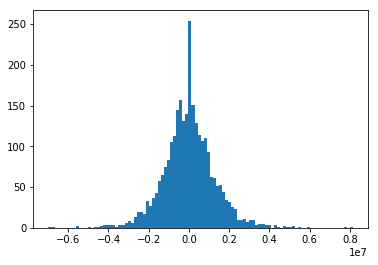

In [19]:
opt_pnl_1 = np.array(opt_pnl_1)
opt_pnl_1.sort()
import matplotlib.pyplot as plt
plt.hist(opt_pnl_1, bins = 100)
np.percentile(opt_pnl_1, 5)